# Car damage classification
Here we will first make a binary classification between damaged and undamaged cars. Next we will determine the damage type. Three damage types are considered here: bonnet, side ways and rear of the car.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [24]:
import os
import pandas as pd
import shutil
from PIL import Image
import hashlib
import numpy as np
from shutil import copyfile
import glob
import matplotlib.pyplot as plt

## web scraping images of damaged and undamaged cars

urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);

window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));

In [51]:
dest = 'C:/Users/manas/Desktop/Kaggle projects/Car crash/cars_undamaged/'
filepath = dest + 'cars.csv'

In [52]:
download_images(filepath, dest, max_pics=1000, max_workers=0) # downloading images to local drive

In [53]:
verify_images(dest, delete=True)

In [62]:
# To rename multiple files in a directory or folder
# for searched google images using different keywords
  
path = "C:/Users/manas/Desktop/Kaggle projects/Car crash/side_damage/"
  
# Function to rename multiple files 
def main(): 
    i = 0
      
    for filename in os.listdir(path): 
        dst ="side_" + str(i+1) + ".jpg"
        src =path + filename 
        dst = path + dst 
          
        # rename() function will 
        # rename all the files 
        os.rename(src, dst) 
        i += 1
  
# Driver Code 
if __name__ == '__main__': 
      
    # Calling main() function 
    main() 

## Number of images per class

In [65]:
path = 'C:/Users/manas/Desktop/Kaggle projects/cars/'
# define damage classes
classes=['cars_damaged','cars_undamaged']
# Number of images collected per class
for c in classes:
  print("Number of {} images: {}".format(c, str(len(get_image_files(path + c)))))

Number of cars_damaged images: 375
Number of cars_undamaged images: 397


In [64]:
path = 'C:/Users/manas/Desktop/Kaggle projects/Car crash/'
# define damage classes
classes=['bonnet_damage','rear_damage','side_damage']
# Number of images collected per class
for c in classes:
  print("Number of {} images: {}".format(c, str(len(get_image_files(path + c)))))

Number of bonnet_damage images: 172
Number of rear_damage images: 150
Number of side_damage images: 164


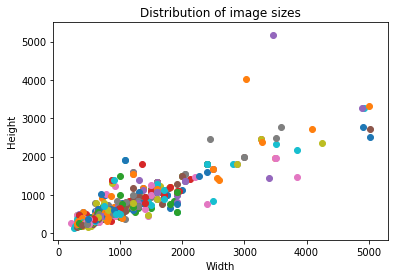

In [67]:
# Scatter plot for image resolution: height vs. width
width_height=[]
for c in classes:
  fnames = get_image_files(path + c)
  for i in fnames:
    im = Image.open(i)
    width, height = im.size
    width_height.append((width, height))    
  
for i in width_height:    
  plt.scatter(i[0],i[1])
  plt.title('Distribution of image sizes')
  plt.xlabel('Width')
  plt.ylabel('Height')